<a href="https://colab.research.google.com/github/toraaglobal/TextMining/blob/master/text_sentiment_analysis_naive_bayes_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#vectoriation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#model
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

#model evaluation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import train_test_split


%matplotlib inline

In [4]:

#Mount the gdrive
import os
from google.colab import drive
drive.mount('/content/drive')


#change directry to the gdrive

os.chdir('./drive/My Drive/Colab Notebooks/data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
## Read Data

train = pd.read_csv('./kaggle-sentiment/train.tsv', sep='\t')
test = pd.read_csv('./kaggle-sentiment/test.tsv', sep='\t')

print('Train shape : {}'.format(train.shape))
print('Test shape : {}'.format(test.shape))

Train shape : (156060, 4)
Test shape : (66292, 3)


In [8]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [0]:
## get the phrase and the sentiment

features = train['Phrase'].values
target = train['Sentiment'].values



In [11]:
## train test split

X_train,X_test, y_train,y_test = train_test_split(features,target, test_size=0.3, random_state=12)

print('X_train Shape: {}'.format(X_train.shape))
print('X_test Shape: {}'.format(X_test.shape))
print('y_train shape: {}'.format(y_train.shape))
print('y_test shape: {}'.format(y_test.shape))



X_train Shape: (109242,)
X_test Shape: (46818,)
y_train shape: (109242,)
y_test shape: (46818,)


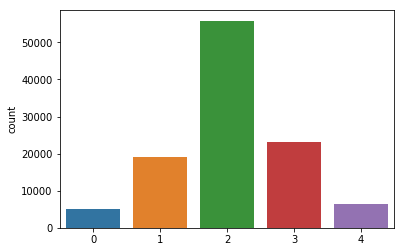

In [13]:
## target distribution
plt.figure()
sns.countplot(y_train)
plt.show()

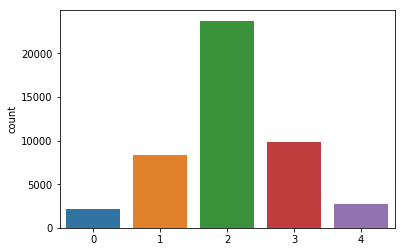

In [14]:
plt.figure()
sns.countplot(y_test)
plt.show()

In [17]:
## count the propotion for each class for baseline accuracy

unique, count = np.unique(y_train, return_counts=True)

for clas, i in zip( unique,count):
  print('{} : {}%'.format(clas, (i/len(y_train) * 100)))

0 : 4.51932406949708%
1 : 17.375185368264955%
2 : 51.11678658391461%
3 : 21.095366251075593%
4 : 5.893337727247762%


In [0]:
## The baseline accuracy using majority vote is 51%


## Vectorization

#  unigram boolean vectorizer, set minimum document frequency to 5
unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=5, stop_words='english')

#  unigram term frequency vectorizer, set minimum document frequency to 5
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5, stop_words='english')

#  unigram and bigram term frequency vectorizer, set minimum document frequency to 5
gram12_count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1,2), min_df=5, stop_words='english')

#  unigram tfidf vectorizer, set minimum document frequency to 5
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words='english')



In [0]:
## create a pipeline

def score_model_pipeline(model, vectorizer, X,y, cv=5):
  nbc = Pipeline([('vect', vectorizer), ('nb', model)])
  scores = cross_val_score(nbc, X,y,cv=cv)
  print('Avg Score: {}'.format(sum(scores)/len(scores)))
  

In [23]:
# model1 multinimialNB
model1 =  MultinomialNB()

score_model_pipeline(model1, unigram_bool_vectorizer,X_train,y_train)

Avg Score: 0.6020029250607873


In [24]:
# count vectorizer

score_model_pipeline(model1, unigram_count_vectorizer,X_train,y_train)

Avg Score: 0.6022409553222035


In [25]:
#ngram
score_model_pipeline(model1, gram12_count_vectorizer,X_train,y_train)

Avg Score: 0.5932517576102463


In [26]:
#tf*idf
score_model_pipeline(model1, unigram_tfidf_vectorizer,X_train,y_train)

Avg Score: 0.5804910652230147


In [27]:
## model 2 
model2 =  BernoulliNB()

score_model_pipeline(model2, unigram_bool_vectorizer,X_train,y_train)

Avg Score: 0.5974991184292984


In [28]:
# count vectorizer

score_model_pipeline(model2, unigram_count_vectorizer,X_train,y_train)

Avg Score: 0.5974991184292984


In [29]:
#ngram
score_model_pipeline(model2, gram12_count_vectorizer,X_train,y_train)

Avg Score: 0.5824500562848445


In [30]:
#tf*idf
score_model_pipeline(model2, unigram_tfidf_vectorizer,X_train,y_train)

Avg Score: 0.5974991184292984


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk.stem

english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([english_stemmer.stem(w) for w in analyzer(doc)])

In [32]:
stem_vecs = StemmedCountVectorizer(min_df=3, analyzer="word")

stem_X_train = stem_vecs.fit_transform(X_train)

model1.fit(stem_X_train, y_train)

stem_test = stem_vecs.transform(X_test)

model1.score(stem_test, y_test)

0.6138878209235764

In [0]:

kaggle_stem_test = stem_vecs.transform(test['Phrase'].values)

prediction_stem = model1.predict(kaggle_stem_test)


kaggle_submission_stem=zip(test['PhraseId'].values, prediction_stem)

# prepare output file
outf=open('./kaggle-sentiment/kaggle_submission.csv', 'w')

# write header
outf.write('PhraseId,Sentiment\n')

# write predictions with ids to the output file
for x, value in enumerate(kaggle_submission_stem):
    outf.write(str(value[0]) + ',' + str(value[1]) + '\n')

# close the output file
outf.close()
